**Example notebook on implementation of tde_spectra_fit**

In [28]:
# import tde_spectra_fit class:

from tde_spectra_fit import TDE_fit # this is the module that does the spectral fitting
from SEM import SEM # this is the module that applies the Barniol Duran model to estimate physical system parameters

Set up your data arrays of the radio observations. In this example we will use data from Alexander et al 2016.

In [16]:


# Example data (from Alexander et al 2016):

flux_density = np.array([2.18, 2.12, 2.13, 2.00, 1.84, 1.56, 1.26, 1.06, 0.84,\
               0.73, 0.59, 0.44, 0.30]) #mJy

u_flux_density_up = np.array([0.08, 0.10, 0.09, 0.05, 0.03, 0.03, 0.03, 0.02, 0.04,\
                 0.02, 0.02, 0.09, 0.04])

u_flux_density_low = u_flux_density_up

frequency = np.array([1.4, 1.5, 1.8, 2.6, 3.4, 5.0, 7.1, 8.5, 11.0, 13.5, 16.0,\
            19.2, 24.5]) #GHz

# Also enter the known system properties:

dL = 90 # luminosity distance, in kpc
z = 0.0206 # redshift
t = 246 # time since jet began in days

# Finally if we know something about the quiescent radio emission of the galaxy, enter it here. If not just enter None.

quiescent_flux_density = 1.8*(frequency/1.4)**(-1) # formula is what Alexander et al 2016 assume

Initialise the spectral fitting class

In [17]:
S = TDE_fit(fd = flux_density,
        fd_err_low = u_flux_density_low,
        fd_err_up = u_flux_density_up,
        frequency = frequency,
        break_number = 5, # see Granot & Sari 2002, ApJ, 568, 2, Figure 1 for choice of break numbers
        quiescent_flux_density = quiescent_flux_density,
        name = 'Alexander_2016',
        nsteps = 1000, # number of steps for emcee fitting to do
        nwalkers = 400 # number of walkers for emcee fitting to use
           ) 

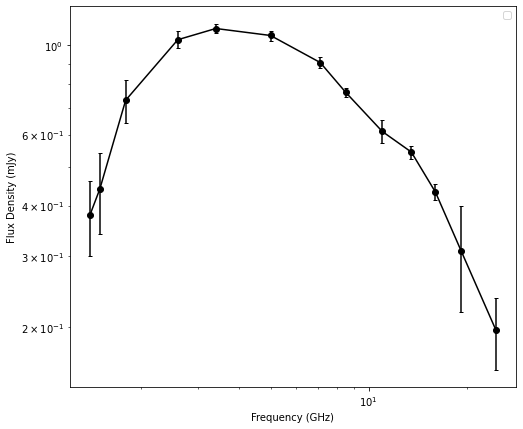

In [18]:
# plot initial data to check all is good:

S.plot_initial_data()

100%|██████████| 1000/1000 [00:22<00:00, 44.80it/s]


(22400, 4)


----------------------------------------------------------
MCMC results:
**Warning** The chain is shorter than 50 times the integrated autocorrelation time for 4 parameter(s). Use this estimate with caution and run a longer chain!
The autocorrelation time is inf. You should run the chains for at least 10 x steps as this.
The MCMC fit parameters are:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

----------------------------------------------------------


/Users/adelle/Documents/TDE_data/spectral_fitting/TDE_spectra/tde_specta_fit/tde_spectra_fit/tde_spectra_fit/tde_spectra_fit.py:301: RuntimeWarning: divide by zero encountered in power
  Fv1 = Fvb * ((v / vb) ** (-beta1 * s) + (v / vb) ** (-beta2 * s)) ** (-1 / s)


----------------------------------------------------------
The peak flux, peak frequency, and p of the spectrum are:
Fp = 1.15 +/- 0.48 mJy
vp = 3.636364 GHz
p = 2.81 +0.14 - 0.12 
----------------------------------------------------------


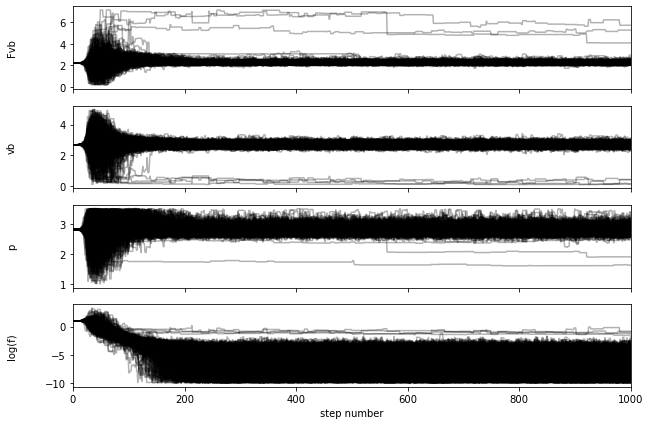

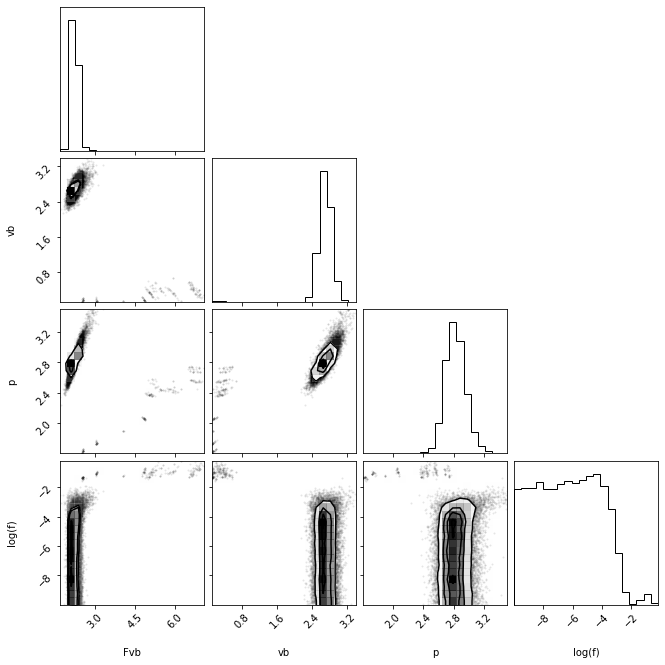

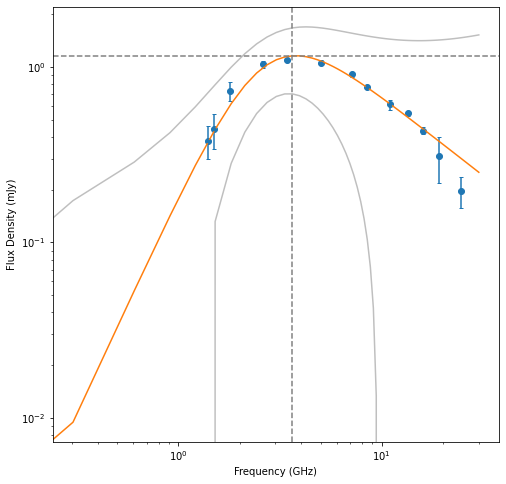

In [19]:
# Looks fine so let's move onto running the emcee fitting and analysing the output:

Fvb, vb, p, Fp, vp, Fvb_u, vb_u, p_u, Fp_u = S.do_fit()

So our fit to the spectrum looks pretty good in the above plot. We find that p=2.8, vp = 3.64, and Fp = 1.15, which are similar to the values reported in Table 2 of Alexander et al 2016 of p=3, vp=4, Fp = 1.14.

Now use the SEM module to calculate the physical jet properties based on this fitted lightcurve:

In [32]:
# initialise the class
sem = SEM( 
            vp=4, #GHz
            Fvp=1.14, #mJy
            p=3,
            dL=dL, #luminosity distance
            z=z, #redshift
            t=t, #days
            geo='spherical', #options are spherical or conical
            fV_correct = True,# option to assume that the emission emanates from a shell with a thickness of 0.1 of the blastwave radius.
            va_gtr_vm=True,
            va=None,
            vm=None,
            save=False,
            name=None,
        )
Eeq, Req = sem.do_analysis()

Assuming spherical geometry..
At time t = 246.0 d
--------------------------------------------------
The energy is: 9.6465334476969e+47 erg
The radius is: 2.4552853656024268e+16 cm
--------------------------------------------------
For this radius and energy, I find:
Outflow velocity: 0.0378377559776258 c
Outflow mass: 0.000753793669642023 msun
Ambient density: 0.9233696972508117 cm^-3
Magnetic field: 0.7218477640510904 G
--------------------------------------------------


Great, these values are similar to what is reported in Alexander et al 2016 for the observations at 246 d.